<a href="https://colab.research.google.com/github/munnurumahesh03-coder/machine-learning-for-classification/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression**

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
weather_data = pd.read_csv('australia.csv')

In [3]:
weather_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54274,3/21/2015,MountGinini,2.7,13.3,0.0,NaN,NaN,ENE,56.0,ENE,...,97.0,69.0,NaN,NaN,NaN,NaN,4.5,10.8,No,No
54275,3/22/2015,MountGinini,4.2,15.4,0.0,NaN,NaN,ENE,52.0,ENE,...,97.0,98.0,NaN,NaN,NaN,NaN,7.2,11.1,No,No
54276,3/23/2015,MountGinini,7.1,16.6,0.0,NaN,NaN,NW,44.0,NW,...,97.0,80.0,NaN,NaN,NaN,NaN,11.0,15.9,No,Yes
54277,3/24/2015,MountGinini,9.1,12.7,1.2,NaN,NaN,NNW,43.0,WNW,...,97.0,99.0,NaN,NaN,NaN,NaN,9.9,8.5,Yes,No


# **Exploratory Data Analysis**

---



In [4]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54279 entries, 0 to 54278
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           54279 non-null  object 
 1   Location       54279 non-null  object 
 2   MinTemp        53664 non-null  float64
 3   MaxTemp        53836 non-null  float64
 4   Rainfall       52851 non-null  float64
 5   Evaporation    24047 non-null  float64
 6   Sunshine       18441 non-null  float64
 7   WindGustDir    48433 non-null  object 
 8   WindGustSpeed  48439 non-null  float64
 9   WindDir9am     48036 non-null  object 
 10  WindDir3pm     51602 non-null  object 
 11  WindSpeed9am   52926 non-null  float64
 12  WindSpeed3pm   52305 non-null  float64
 13  Humidity9am    53054 non-null  float64
 14  Humidity3pm    52573 non-null  float64
 15  Pressure9am    45067 non-null  float64
 16  Pressure3pm    45117 non-null  float64
 17  Cloud9am       29614 non-null  float64
 18  Cloud3

In [5]:
weather_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,53664.000000,53836.000000,52851.000000,24047.000000,18441.000000,48439.000000,52926.000000,52305.000000,53054.000000,52573.000000,45067.000000,45117.000000,29614.000000,29176.000000,53350.000000,52827.000000
mean,12.090545,22.905138,2.672345,5.528760,7.568706,39.136130,12.836167,17.777612,70.452124,52.604017,1018.348754,1015.783328,4.432160,4.487216,16.725843,21.481767
std,6.368965,6.632921,9.259025,4.483735,3.798647,14.071749,9.078854,9.267460,17.466441,20.610728,6.851227,6.754559,2.931501,2.723280,5.965686,6.437533
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,-5.900000,-5.100000
25%,7.700000,18.600000,0.000000,2.800000,4.900000,30.000000,6.000000,11.000000,59.000000,37.000000,1013.800000,1011.200000,1.000000,2.000000,12.800000,17.300000
50%,12.700000,22.600000,0.000000,4.600000,8.600000,37.000000,11.000000,17.000000,71.000000,52.000000,1018.400000,1015.800000,5.000000,5.000000,17.300000,21.100000
75%,17.200000,27.000000,0.600000,7.200000,10.500000,48.000000,19.000000,24.000000,83.000000,67.000000,1023.000000,1020.300000,7.000000,7.000000,21.100000,25.400000
max,29.700000,47.300000,371.000000,145.000000,14.100000,135.000000,130.000000,83.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.700000,46.700000


In [6]:
weather_data.isnull().sum()

,0
Date,0
Location,0
MinTemp,615
MaxTemp,443
Rainfall,1428
Evaporation,30232
Sunshine,35838
WindGustDir,5846
WindGustSpeed,5840
WindDir9am,6243


In [7]:
print(f"Original number of rows: {len(weather_data)}")
weather_data.dropna(subset=['RainTomorrow'], inplace=True)
print(f"Number of rows after dropping missing target values: {len(weather_data)}")

Original number of rows: 54279
Number of rows after dropping missing target values: 52851


In [8]:
print("\nDistribution of 'RainTomorrow':")
print(weather_data['RainTomorrow'].value_counts(normalize=True))


Distribution of 'RainTomorrow':
RainTomorrow
No     0.775936
Yes    0.224064
Name: proportion, dtype: float64


In [9]:
print("\nConverting target variable to numerical format (0 for 'No', 1 for 'Yes')...")
weather_data['RainTomorrow'] = weather_data['RainTomorrow'].map({'No': 0, 'Yes': 1})
print("Conversion complete.")
print("First 5 values of the transformed 'RainTomorrow' column:")
print(weather_data['RainTomorrow'].head())


Converting target variable to numerical format (0 for 'No', 1 for 'Yes')...
Conversion complete.
First 5 values of the transformed 'RainTomorrow' column:
0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64


In [10]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52851 entries, 0 to 54277
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           52851 non-null  object 
 1   Location       52851 non-null  object 
 2   MinTemp        52427 non-null  float64
 3   MaxTemp        52643 non-null  float64
 4   Rainfall       52121 non-null  float64
 5   Evaporation    23735 non-null  float64
 6   Sunshine       18412 non-null  float64
 7   WindGustDir    47601 non-null  object 
 8   WindGustSpeed  47607 non-null  float64
 9   WindDir9am     46946 non-null  object 
 10  WindDir3pm     50453 non-null  object 
 11  WindSpeed9am   51756 non-null  float64
 12  WindSpeed3pm   51144 non-null  float64
 13  Humidity9am    51862 non-null  float64
 14  Humidity3pm    51385 non-null  float64
 15  Pressure9am    44046 non-null  float64
 16  Pressure3pm    44091 non-null  float64
 17  Cloud9am       29049 non-null  float64
 18  Cloud3pm   

In [11]:
weather_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,52427.000000,52643.000000,52121.000000,23735.000000,18412.000000,47607.000000,51756.000000,51144.000000,51862.000000,51385.000000,44046.000000,44091.000000,29049.000000,28598.000000,52147.000000,51629.000000,52851.000000
mean,12.079316,22.899299,2.659584,5.523430,7.569308,39.102611,12.788701,17.761399,70.399175,52.551367,1018.350876,1015.787024,4.410926,4.475768,16.713468,21.471514,0.224064
std,6.363168,6.607231,9.260305,4.474917,3.797320,14.082018,9.073173,9.274936,17.473640,20.597159,6.849924,6.749952,2.930021,2.722651,5.954159,6.418630,0.416968
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,-5.900000,-5.100000,0.000000
25%,7.700000,18.600000,0.000000,2.800000,4.900000,30.000000,6.000000,11.000000,59.000000,37.000000,1013.800000,1011.200000,1.000000,2.000000,12.800000,17.300000,0.000000
50%,12.700000,22.600000,0.000000,4.600000,8.600000,37.000000,11.000000,17.000000,71.000000,52.000000,1018.400000,1015.800000,5.000000,5.000000,17.300000,21.100000,0.000000
75%,17.200000,27.000000,0.600000,7.200000,10.500000,48.000000,19.000000,24.000000,83.000000,67.000000,1023.000000,1020.400000,7.000000,7.000000,21.100000,25.400000,0.000000
max,29.700000,47.300000,371.000000,145.000000,14.100000,135.000000,130.000000,83.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.700000,46.700000,1.000000


# **Visualization**

---



Text(0, 0.5, 'Count')

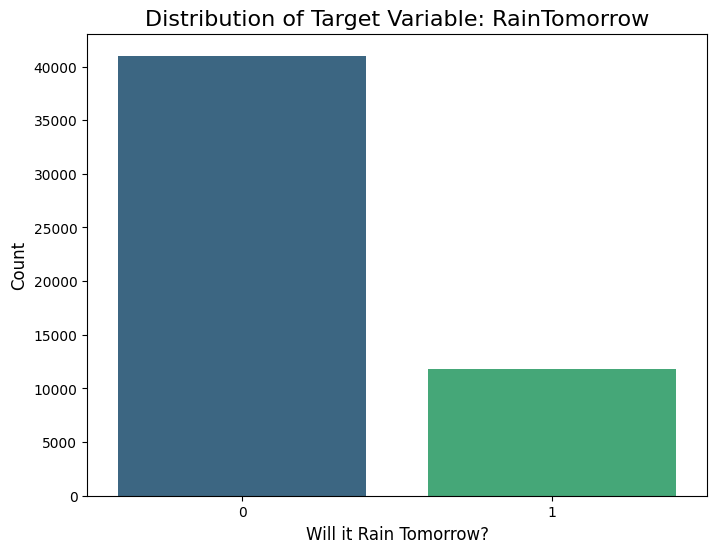

In [12]:
plt.figure(figsize=(8, 6))
ax = plt.gca()

sns.countplot(
    data=weather_data,
    x='RainTomorrow',
    ax=ax,
    palette='viridis'
)
ax.set_title('Distribution of Target Variable: RainTomorrow', fontsize=16)
ax.set_xlabel('Will it Rain Tomorrow?', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

Text(0, 0.5, 'Frequency (Log Scale)')

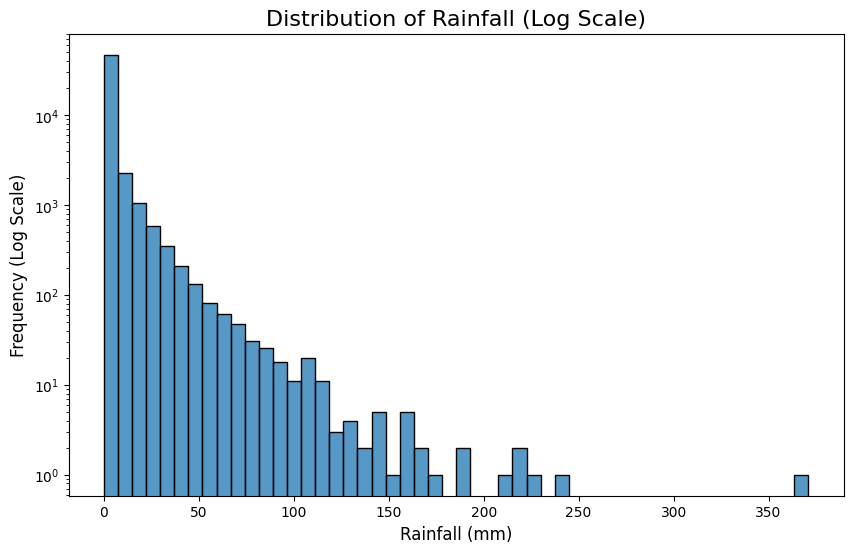

In [13]:
plt.figure(figsize=(10, 6))
ax = plt.gca()


sns.histplot(
    data=weather_data,
    x='Rainfall',
    ax=ax,
    bins=50
)

ax.set_yscale('log')

ax.set_title('Distribution of Rainfall (Log Scale)', fontsize=16)
ax.set_xlabel('Rainfall (mm)', fontsize=12)
ax.set_ylabel('Frequency (Log Scale)', fontsize=12)

In [14]:
px.histogram(weather_data,x='Location',color='RainToday',title='Location vs Raintoday')

Text(0, 0.5, 'Humidity at 3pm (%)')

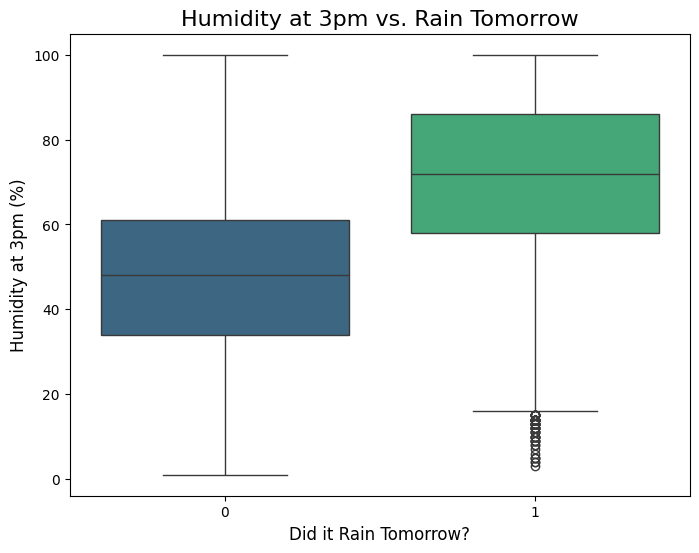

In [15]:
plt.figure(figsize=(8, 6))

sns.boxplot(
    data=weather_data,
    x='RainTomorrow',
    y='Humidity3pm',
    palette='viridis'
)

plt.title('Humidity at 3pm vs. Rain Tomorrow', fontsize=16)
plt.xlabel('Did it Rain Tomorrow?', fontsize=12)
plt.ylabel('Humidity at 3pm (%)', fontsize=12)

Text(0, 0.5, 'Sunshine (Hours)')

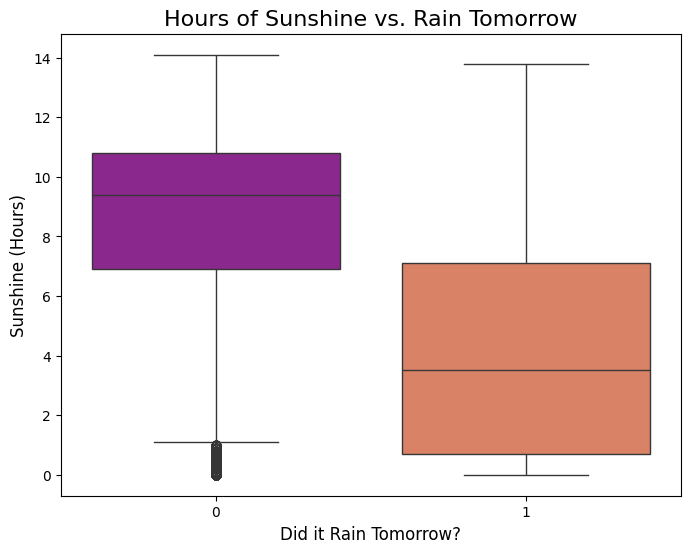

In [16]:
plt.figure(figsize=(8, 6))

sns.boxplot(
    data=weather_data,
    x='RainTomorrow',
    y='Sunshine',
    palette='plasma'
)

plt.title('Hours of Sunshine vs. Rain Tomorrow', fontsize=16)
plt.xlabel('Did it Rain Tomorrow?', fontsize=12)
plt.ylabel('Sunshine (Hours)', fontsize=12)

Text(0.5, 1.0, 'Correlation Heatmap of All Numerical Features')

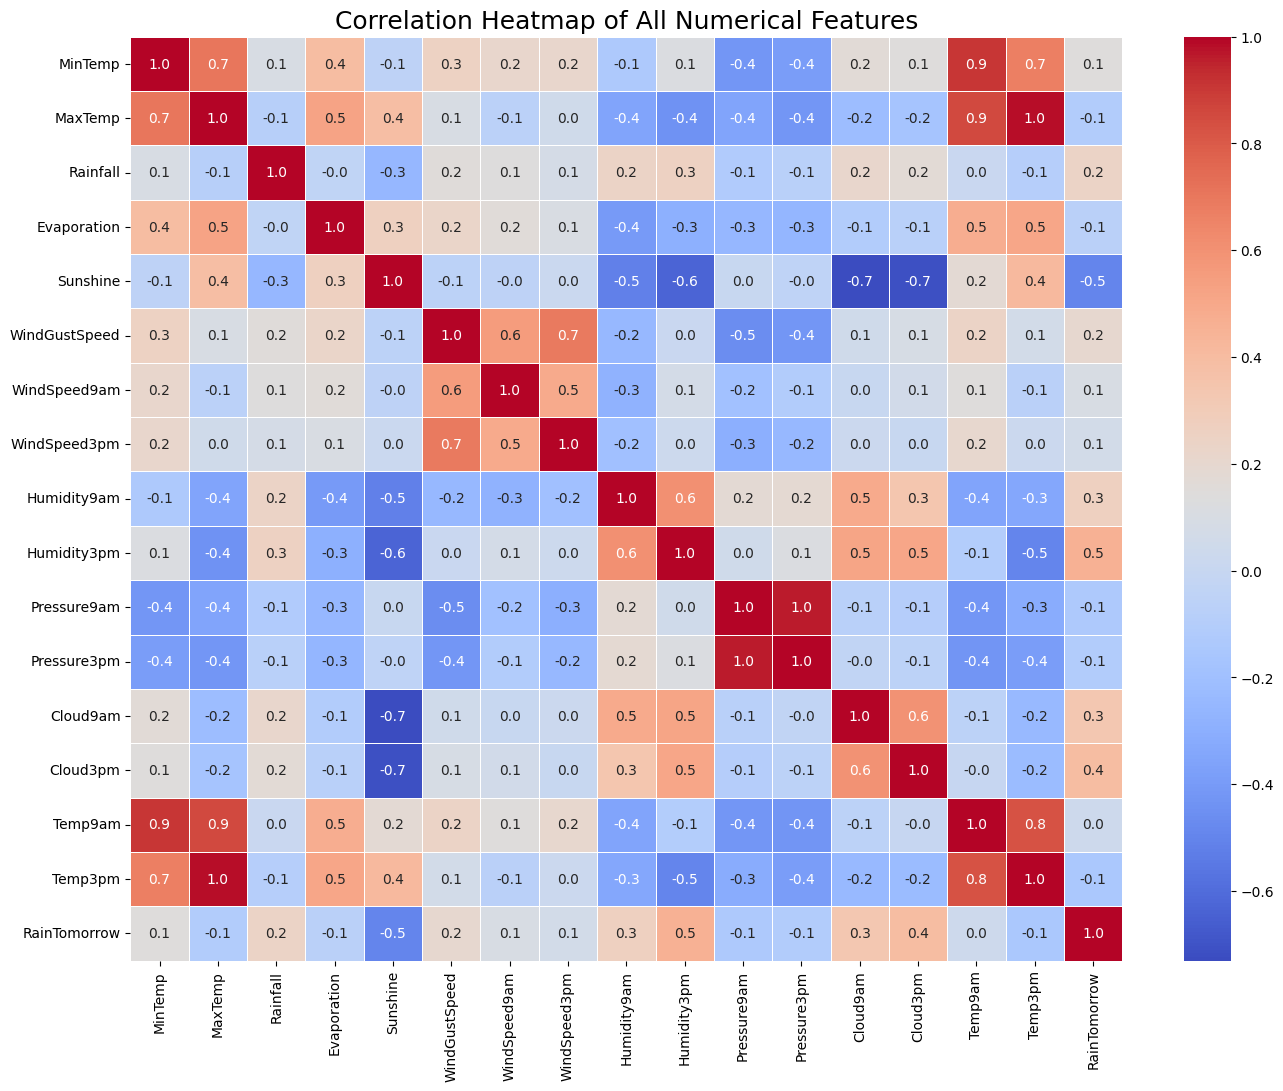

In [17]:
plt.figure(figsize=(16, 12)) # Create a new, separate figure for the large heatmap
correlation_matrix = weather_data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=.5)
plt.title('Correlation Heatmap of All Numerical Features', fontsize=18)

# **Feature Engineering**

---



In [18]:
# --- Make a copy to avoid changing the original raw data ---
df_eng = weather_data.copy()

# --- 1. Date-Based Features ---
# First, ensure the 'Date' column is in datetime format
df_eng['Date'] = pd.to_datetime(df_eng['Date'])

# Extract year, month, and day
df_eng['Year'] = df_eng['Date'].dt.year
df_eng['Month'] = df_eng['Date'].dt.month
df_eng['Day'] = df_eng['Date'].dt.day

# It's often useful to know the day of the year as well
df_eng['DayOfYear'] = df_eng['Date'].dt.dayofyear

print("Created date-based features: Year, Month, Day, DayOfYear")

Created date-based features: Year, Month, Day, DayOfYear


In [19]:
# Daily temperature range
df_eng['TempRange'] = df_eng['MaxTemp'] - df_eng['MinTemp']

# Average temperature for the day
df_eng['AvgTemp'] = (df_eng['MinTemp'] + df_eng['MaxTemp']) / 2

print("Created temperature-based features: TempRange, AvgTemp")

Created temperature-based features: TempRange, AvgTemp


In [20]:
df_eng['PressureChange'] = df_eng['Pressure3pm'] - df_eng['Pressure9am']

print("Created pressure-based feature: PressureChange")

Created pressure-based feature: PressureChange


In [21]:
df_eng['AvgWindSpeed'] = (df_eng['WindSpeed9am'] + df_eng['WindSpeed3pm']) / 2

print("Created wind-based feature: AvgWindSpeed")

Created wind-based feature: AvgWindSpeed


In [22]:
df_eng['HumidityTemp_Interaction'] = df_eng['AvgTemp'] * (df_eng['Humidity3pm'] * 0.01)

print("Created interaction feature: HumidityTemp_Interaction")

Created interaction feature: HumidityTemp_Interaction


In [23]:
df_eng = df_eng.drop('Date', axis=1)
print("\nDropped the original 'Date' column.")


Dropped the original 'Date' column.


In [24]:
# --- Display the results ---
print("\n--- DataFrame with New Features (first 5 rows) ---")
display(df_eng.head())

print(f"\nOriginal number of columns: {len(weather_data.columns)}")
print(f"New number of columns: {len(df_eng.columns)}")


--- DataFrame with New Features (first 5 rows) ---


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,RainTomorrow,Year,Month,Day,DayOfYear,TempRange,AvgTemp,PressureChange,AvgWindSpeed,HumidityTemp_Interaction
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,0,2008,12,1,336,9.5,18.15,-0.6,22.0,3.9930
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,0,2008,12,2,337,17.7,16.25,-2.8,13.0,4.0625
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,0,2008,12,3,338,12.8,19.30,1.1,22.5,5.7900
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,0,2008,12,4,339,18.8,18.60,-4.8,10.0,2.9760
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,0,2008,12,5,340,14.8,24.90,-4.8,13.5,8.2170



Original number of columns: 23
New number of columns: 31


In [25]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52851 entries, 0 to 54277
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Location                  52851 non-null  object 
 1   MinTemp                   52427 non-null  float64
 2   MaxTemp                   52643 non-null  float64
 3   Rainfall                  52121 non-null  float64
 4   Evaporation               23735 non-null  float64
 5   Sunshine                  18412 non-null  float64
 6   WindGustDir               47601 non-null  object 
 7   WindGustSpeed             47607 non-null  float64
 8   WindDir9am                46946 non-null  object 
 9   WindDir3pm                50453 non-null  object 
 10  WindSpeed9am              51756 non-null  float64
 11  WindSpeed3pm              51144 non-null  float64
 12  Humidity9am               51862 non-null  float64
 13  Humidity3pm               51385 non-null  float64
 14  Pressure9am

In [26]:
print("\n--- Preparing 'RainToday' Feature ---")
if 'RainToday' in df_eng.columns and df_eng['RainToday'].dtype == 'object':
    df_eng['RainToday'] = df_eng['RainToday'].map({'No': 0, 'Yes': 1})
    print("Converted 'RainToday' to 0s and 1s. It will be treated as CATEGORICAL in the pipeline.")

print("\n--- Final DataFrame Info ---")
df_eng.info()


--- Preparing 'RainToday' Feature ---
Converted 'RainToday' to 0s and 1s. It will be treated as CATEGORICAL in the pipeline.

--- Final DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 52851 entries, 0 to 54277
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Location                  52851 non-null  object 
 1   MinTemp                   52427 non-null  float64
 2   MaxTemp                   52643 non-null  float64
 3   Rainfall                  52121 non-null  float64
 4   Evaporation               23735 non-null  float64
 5   Sunshine                  18412 non-null  float64
 6   WindGustDir               47601 non-null  object 
 7   WindGustSpeed             47607 non-null  float64
 8   WindDir9am                46946 non-null  object 
 9   WindDir3pm                50453 non-null  object 
 10  WindSpeed9am              51756 non-null  float64
 11  WindSpeed3pm        

# **Train Test Split**

---



In [27]:
# --- Splitting the data based on the 'Year' column ---
train_df = df_eng[df_eng.Year < 2015].copy()
val_df = df_eng[df_eng.Year == 2015].copy()
test_df = df_eng[df_eng.Year > 2015].copy()

# --- Verify the Shapes ---
print("--- DataFrame Shapes after Time-Based Splitting ---")
print("Training DataFrame shape:", train_df.shape)
print("Validation DataFrame shape:", val_df.shape)
print("Test DataFrame shape:", test_df.shape)

--- DataFrame Shapes after Time-Based Splitting ---
Training DataFrame shape: (37801, 31)
Validation DataFrame shape: (6060, 31)
Test DataFrame shape: (8990, 31)


In [28]:
train_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,RainTomorrow,Year,Month,Day,DayOfYear,TempRange,AvgTemp,PressureChange,AvgWindSpeed,HumidityTemp_Interaction
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,0,2008,12,1,336,9.5,18.15,-0.6,22.0,3.9930
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,0,2008,12,2,337,17.7,16.25,-2.8,13.0,4.0625
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,0,2008,12,3,338,12.8,19.30,1.1,22.5,5.7900
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,0,2008,12,4,339,18.8,18.60,-4.8,10.0,2.9760
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,0,2008,12,5,340,14.8,24.90,-4.8,13.5,8.2170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54190,MountGinini,3.8,14.3,0.0,NaN,NaN,NE,35.0,NE,NE,...,0,2014,12,27,361,10.5,9.05,NaN,9.0,6.1540
54191,MountGinini,5.2,18.5,0.0,NaN,NaN,WNW,30.0,NW,NW,...,1,2014,12,28,362,13.3,11.85,NaN,8.0,6.8730
54192,MountGinini,8.7,16.9,3.4,NaN,NaN,W,56.0,WNW,NW,...,1,2014,12,29,363,8.2,12.80,NaN,18.5,12.2880
54193,MountGinini,3.2,14.5,2.6,NaN,NaN,WSW,59.0,W,W,...,0,2014,12,30,364,11.3,8.85,NaN,19.5,4.7790


In [29]:
val_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,RainTomorrow,Year,Month,Day,DayOfYear,TempRange,AvgTemp,PressureChange,AvgWindSpeed,HumidityTemp_Interaction
2133,Albury,11.4,33.5,0.0,NaN,NaN,WSW,30.0,ESE,W,...,0,2015,1,1,1,22.1,22.45,-2.5,9.0,3.1430
2134,Albury,15.5,39.6,0.0,NaN,NaN,NE,56.0,ESE,ESE,...,0,2015,1,2,2,24.1,27.55,-3.6,9.0,3.3060
2135,Albury,17.1,38.3,0.0,NaN,NaN,NNE,48.0,NE,N,...,0,2015,1,3,3,21.2,27.70,-5.6,20.0,5.2630
2136,Albury,26.0,33.1,0.0,NaN,NaN,NNE,41.0,ESE,W,...,0,2015,1,4,4,7.1,29.55,-1.5,7.0,10.9335
2137,Albury,19.0,35.2,0.0,NaN,NaN,E,33.0,SSE,SE,...,0,2015,1,5,5,16.2,27.10,-2.7,8.0,9.2140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54273,MountGinini,13.7,20.5,0.0,NaN,NaN,NW,57.0,W,W,...,0,2015,3,20,79,6.8,17.10,NaN,14.0,5.9850
54274,MountGinini,2.7,13.3,0.0,NaN,NaN,ENE,56.0,ENE,ENE,...,0,2015,3,21,80,10.6,8.00,NaN,18.5,5.5200
54275,MountGinini,4.2,15.4,0.0,NaN,NaN,ENE,52.0,ENE,N,...,0,2015,3,22,81,11.2,9.80,NaN,11.5,9.6040
54276,MountGinini,7.1,16.6,0.0,NaN,NaN,NW,44.0,NW,NW,...,1,2015,3,23,82,9.5,11.85,NaN,21.5,9.4800


In [30]:
test_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,RainTomorrow,Year,Month,Day,DayOfYear,TempRange,AvgTemp,PressureChange,AvgWindSpeed,HumidityTemp_Interaction
2498,Albury,20.4,37.6,0.0,NaN,NaN,ENE,54.0,NaN,ESE,...,0,2016,1,1,1,17.2,29.00,-4.2,3.5,4.9300
2499,Albury,20.9,33.6,0.4,NaN,NaN,SSE,50.0,SSE,SE,...,1,2016,1,2,2,12.7,27.25,-2.7,13.0,8.1750
2500,Albury,18.4,23.1,2.2,NaN,NaN,ENE,48.0,ESE,ENE,...,1,2016,1,3,3,4.7,20.75,0.8,25.0,13.9025
2501,Albury,17.3,23.7,15.6,NaN,NaN,SSE,39.0,SE,SSE,...,1,2016,1,4,4,6.4,20.50,-1.4,13.0,13.3250
2502,Albury,15.5,22.9,6.8,NaN,NaN,ENE,31.0,SE,SSE,...,0,2016,1,5,5,7.4,19.20,-2.4,7.5,12.0960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52057,Tuggeranong,-1.2,15.1,0.4,NaN,NaN,WSW,15.0,NaN,NNW,...,0,2017,6,21,172,16.3,6.95,-2.5,3.5,2.6410
52058,Tuggeranong,-0.4,14.0,0.0,NaN,NaN,N,24.0,NaN,NNW,...,0,2017,6,22,173,14.4,6.80,-4.5,7.5,2.9920
52059,Tuggeranong,-3.5,13.4,0.0,NaN,NaN,NW,33.0,SW,NW,...,0,2017,6,23,174,16.9,4.95,-5.9,9.5,1.8810
52060,Tuggeranong,0.1,14.5,0.0,NaN,NaN,NW,35.0,N,NW,...,0,2017,6,24,175,14.4,7.30,-1.7,13.0,3.1390


# **Input and Target Columns**

---



In [31]:
target_column = 'RainTomorrow'

# Create Training sets
X_train = train_df.drop(target_column, axis=1)
y_train = train_df[target_column]

In [32]:
# Create Validation sets
X_val = val_df.drop(target_column, axis=1)
y_val = val_df[target_column]

In [33]:
# Create Test sets
X_test = test_df.drop(target_column, axis=1)
y_test = test_df[target_column]

In [34]:
# --- Verify the Shapes ---
print("--- Final Dataset Shapes ---")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print("-" * 30)
print(f"Shape of X_val:   {X_val.shape}")
print(f"Shape of y_val:   {y_val.shape}")
print("-" * 30)
print(f"Shape of X_test:  {X_test.shape}")
print(f"Shape of y_test:  {y_test.shape}")

--- Final Dataset Shapes ---
Shape of X_train: (37801, 30)
Shape of y_train: (37801,)
------------------------------
Shape of X_val:   (6060, 30)
Shape of y_val:   (6060,)
------------------------------
Shape of X_test:  (8990, 30)
Shape of y_test:  (8990,)


# **Pipeline**

---



In [35]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# 1. Identify Numerical and Categorical Columns from X_train
# -----------------------------------------------------------
# Note: We explicitly drop 'Year' as it was only for splitting and we don't want it in the model.
numerical_features = X_train.select_dtypes(include=np.number).columns.drop('Year').tolist()
categorical_features = X_train.select_dtypes(exclude=np.number).columns.tolist()

# The 'RainToday' column is currently a float (0.0/1.0), but it's conceptually categorical.
# Let's move it to the categorical list to be one-hot encoded.
if 'RainToday' in numerical_features:
    numerical_features.remove('RainToday')
    categorical_features.append('RainToday')

print(f"Identified {len(numerical_features)} numerical features for the pipeline.")
print(f"Identified {len(categorical_features)} categorical features for the pipeline.")

# 2. Construct the Preprocessing Pipelines
# ----------------------------------------
# Numerical pipeline: Median imputation + Standard scaling
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline: Missing value imputation + One-hot encoding
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent',fill_value='unknown')), # Using most_frequent is a safe bet for categoricals
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'))
])

# 3. Combine Preprocessing Steps with ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='drop' # Drop any columns not specified (like 'Year')
)

# 4. Create the Full Model Pipeline
# ---------------------------------
# This chains the preprocessor and the classifier together.
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42)) # liblinear is good for this dataset size
])

print("\n✅ Preprocessing and full model pipelines created successfully!")

model_pipeline

Identified 24 numerical features for the pipeline.
Identified 5 categorical features for the pipeline.

✅ Preprocessing and full model pipelines created successfully!


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp9a...
                                                   'HumidityTemp_Interaction']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am', 'WindDir3pm',
                                                   'RainToday'])])),
                ('classifier',
                 LogisticRegression(random_state=42, solver='liblinear'))])

# **Evaluation adn Selection**

---



In [36]:
print("Training the Logistic Regression pipeline...")
model_pipeline.fit(X_train, y_train)
print("✅ Training complete.")

Training the Logistic Regression pipeline...
✅ Training complete.


In [37]:
from sklearn.metrics import f1_score, roc_auc_score, classification_report

print("\nMaking predictions on the validation data...")
val_preds = model_pipeline.predict(X_val)
val_preds_proba = model_pipeline.predict_proba(X_val)[:, 1] # Get probabilities for AUC-ROC

print("\n--- Baseline Logistic Regression Evaluation ---")
f1 = f1_score(y_val, val_preds)
roc_auc = roc_auc_score(y_val, val_preds_proba)
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC:  {roc_auc:.4f}")

print("\n--- Classification Report ---")
print(classification_report(y_val, val_preds))



Making predictions on the validation data...

--- Baseline Logistic Regression Evaluation ---
F1-Score: 0.5592
AUC-ROC:  0.8531

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4628
           1       0.76      0.44      0.56      1432

    accuracy                           0.83      6060
   macro avg       0.80      0.70      0.73      6060
weighted avg       0.83      0.83      0.82      6060



# **Helper Function**

---



In [38]:
def test_hyperparameter(param_name, param_value):

    params = {param_name: param_value}

    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(solver='liblinear', random_state=42, **params))
    ])

    # Train the pipeline
    model_pipeline.fit(X_train, y_train)

    train_preds = model_pipeline.predict(X_train)
    train_f1 = f1_score(y_train, train_preds)

    # --- Validation Metrics ---
    val_preds = model_pipeline.predict(X_val)
    val_f1 = f1_score(y_val, val_preds)

    # Return a dictionary with the F1 Error for both sets.
    return {
         param_name: param_value,
        'train_f1_error': round(1 - train_f1, 4),
        'validation_f1_error': round(1 - val_f1, 4)
    }

# **Hyperparameter Tuning**

---



# **Class weight**

---



In [39]:
class_weight_df = pd.DataFrame(test_hyperparameter('class_weight', w) for w in [None, 'balanced'])

display(class_weight_df)

,class_weight,train_f1_error,validation_f1_error
0,None,0.4115,0.4408
1,balanced,0.3865,0.3774


# **C values**

---



In [40]:
c_df = pd.DataFrame(test_hyperparameter('C', c) for c in [0.001, 0.01, 0.1, 1, 10, 100])

display(c_df)

,C,train_f1_error,validation_f1_error
0,0.001,0.4364,0.4641
1,0.010,0.4204,0.4534
2,0.100,0.4139,0.4440
3,1.000,0.4115,0.4408
4,10.000,0.4117,0.4396
5,100.000,0.4118,0.4403


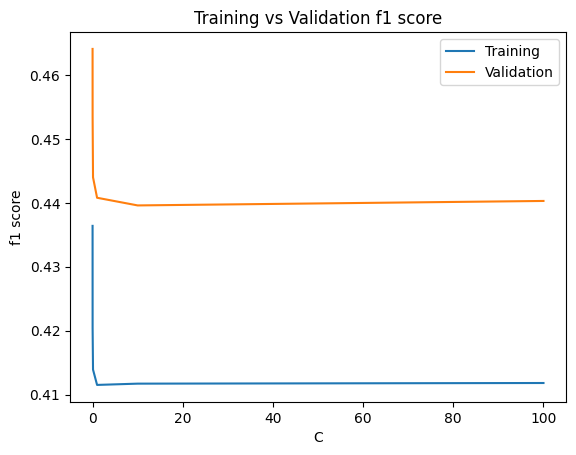

In [41]:
plt.figure()
plt.plot(c_df['C'],c_df['train_f1_error'])
plt.plot(c_df['C'],c_df['validation_f1_error'])
plt.title('Training vs Validation f1 score')
plt.xlabel('C')
plt.ylabel('f1 score')
plt.legend(['Training','Validation'])

# **GridSearch CV**

---



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Assume 'preprocessor', 'X_train', and 'y_train' are already defined.

# --- 1. Define the Model Pipeline ---

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

# --- 2. Define the Hyperparameter Grid to Search ---

param_grid = {
    'classifier__C': [0.1, 1.0, 10, 100],
    'classifier__class_weight': [None, 'balanced']
}

# --- 3. Set up and Run GridSearchCV ---
print("--- Running GridSearchCV for Logistic Regression ---")

grid_search = GridSearchCV(
    estimator=model_pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# This is the main training and tuning step.
grid_search.fit(X_train, y_train)

# --- 4. Display the Results ---
print("\n✅ GridSearchCV Complete.")
print(f"Best F1-Score found during cross-validation: {grid_search.best_score_:.4f}")
print(f"Best Hyperparameters found: {grid_search.best_params_}")

# You can also view the detailed results for all combinations
cv_results_df = pd.DataFrame(grid_search.cv_results_)
print("\n--- Detailed CV Results (Top 5) ---")
display(cv_results_df[['param_classifier__C', 'param_classifier__class_weight', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score').head())

# The 'grid_search' object itself is now the best version of the model,
# retrained on all the training data, ready for evaluation or saving.
best_lr_model = grid_search.best_estimator_


--- Running GridSearchCV for Logistic Regression ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits

✅ GridSearchCV Complete.
Best F1-Score found during cross-validation: 0.5769
Best Hyperparameters found: {'classifier__C': 0.1, 'classifier__class_weight': None}

--- Detailed CV Results (Top 5) ---


,param_classifier__C,param_classifier__class_weight,mean_test_score,std_test_score,rank_test_score
0,0.1,None,0.576930,0.021108,1
1,0.1,balanced,0.571496,0.022391,2
2,1.0,None,0.566070,0.030341,3
4,10.0,None,0.558538,0.037546,4
6,100.0,None,0.558356,0.037948,5


# **Evaluation**

---



In [ ]:
best_lr_model = grid_search.best_estimator_

print("✅ Best model extracted from GridSearchCV.")
print(f"The best model has parameters: C=0.1 and class_weight=None")

✅ Best model extracted from GridSearchCV.
The best model has parameters: C=0.1 and class_weight=None


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score

# --- Step 1: Get the best model from the completed Grid Search ---
best_lr_model = grid_search.best_estimator_
print("✅ Best model extracted from GridSearchCV.")

# --- Step 2: Make predictions on the validation set ---
print("Making predictions on the unseen validation data...")
val_preds = best_lr_model.predict(X_val)
val_preds_proba = best_lr_model.predict_proba(X_val)[:, 1] # Get probabilities for the 'Yes' class for AUC

# --- Step 3: Calculate and print the final scores ---
final_f1_score = f1_score(y_val, val_preds)
final_auc_score = roc_auc_score(y_val, val_preds_proba)

print("\n--- Official Gauntlet Score for Logistic Regression ---")
print(f"Validation F1-Score: {final_f1_score:.4f}")
print(f"Validation AUC-ROC:  {final_auc_score:.4f}")
print("----------------------------------------------------")
print("\nThis is the score to beat for all future models.")

✅ Best model extracted from GridSearchCV.
Making predictions on the unseen validation data...

--- Official Gauntlet Score for Logistic Regression ---
Validation F1-Score: 0.5656
Validation AUC-ROC:  0.8710
----------------------------------------------------

This is the score to beat for all future models.


# **Feature Importance**

---



In [ ]:
from sklearn.inspection import permutation_importance

perm_importance_df = pd.DataFrame({
    'Feature': X_val.columns,
    'Importance': permutation_importance(best_lr_model, X_val, y_val, scoring='f1', n_repeats=5, random_state=42).importances_mean
}).sort_values(by='Importance', ascending=False)

display(perm_importance_df.head(10))


,Feature,Importance
13,Humidity3pm,0.252385
7,WindGustSpeed,0.071985
25,TempRange,0.034536
17,Cloud3pm,0.028558
2,MaxTemp,0.025372
5,Sunshine,0.023753
20,RainToday,0.022080
14,Pressure9am,0.020107
0,Location,0.013593
26,AvgTemp,0.010325


<Axes: title={'center': 'Feature_Importance'}, xlabel='Importance', ylabel='Feature'>

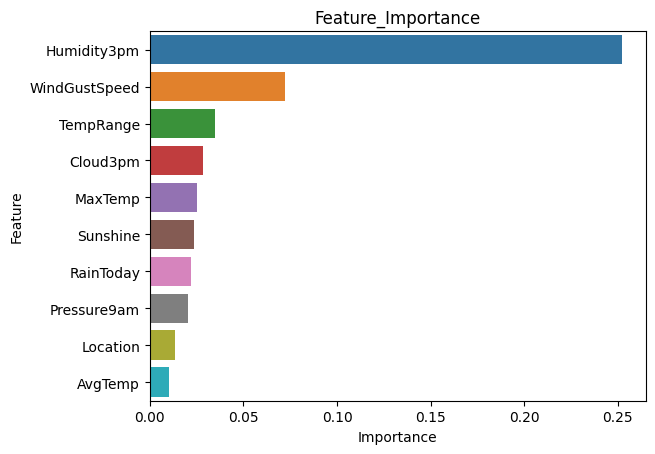

In [ ]:
plt.title('Feature_Importance')
sns.barplot(data=perm_importance_df.head(10),x='Importance',y='Feature',hue='Feature')

# **Saving through Joblib**

---



In [ ]:
import joblib

print("--- Training the CORRECTED Model (class_weight='balanced', C=10) ---")

# Let's assume C=10 was the best C value we found when using class_weight='balanced'.
# If another C was better, use that one.
correct_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced', C=10))
])

correct_model.fit(X_train, y_train)
print("✅ Corrected model trained successfully.")


model_filename = '01_logistic_regression_tuned.joblib'
joblib.dump(correct_model, model_filename)
print(f"\n✅ Better model has been saved to '{model_filename}'.")
print("The old model file has been overwritten.")


# we have used different hyperparameters than suggested by gridsearch cv because they are overfitting to the cross validation

--- Training the CORRECTED Model (class_weight='balanced', C=10) ---
✅ Corrected model trained successfully.

✅ Better model has been saved to '01_logistic_regression_tuned.joblib'.
The old model file has been overwritten.

Next Action: Please stop your old Gradio script and run 'python app.py' again.
It will now load the new, more reliable model.


# **Deployment**

---



In [ ]:
import gradio as gr
import os

MODEL_FILE_PATH = '01_logistic_regression_tuned.joblib'

if not os.path.exists(MODEL_FILE_PATH):
    print(f"❌ Error: Model file '{MODEL_FILE_PATH}' not found.")
    exit()

try:
    model_pipeline = joblib.load(MODEL_FILE_PATH)
    print("✅ Model pipeline loaded successfully.")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    exit()

AUSTRALIA_LOCATIONS = [
    'Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree', 'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond', 'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns', 'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston', 'AliceSprings', 'Darwin', 'Katherine', 'Uluru'
]
AUSTRALIA_LOCATIONS.sort()

def predict_rain(Location, MinTemp, MaxTemp, Rainfall, WindGustSpeed, Humidity9am, Humidity3pm, Pressure3pm, RainToday):
    input_data = pd.DataFrame({
        'Location': [Location], 'MinTemp': [MinTemp], 'MaxTemp': [MaxTemp],
        'Rainfall': [Rainfall], 'WindGustSpeed': [WindGustSpeed], 'Humidity9am': [Humidity9am],
        'Humidity3pm': [Humidity3pm], 'Pressure3pm': [Pressure3pm], 'RainToday': [RainToday],
        'Evaporation': [np.nan], 'Sunshine': [np.nan], 'WindGustDir': [np.nan],
        'WindDir9am': [np.nan], 'WindDir3pm': [np.nan], 'WindSpeed9am': [np.nan],
        'WindSpeed3pm': [np.nan], 'Pressure9am': [np.nan], 'Cloud9am': [np.nan],
        'Cloud3pm': [np.nan], 'Temp9am': [np.nan], 'Temp3pm': [np.nan],
        'Year': [2024], 'Month': [9], 'Day': [14], 'DayOfYear': [258],
        'TempRange': [MaxTemp - MinTemp if MinTemp and MaxTemp else np.nan],
        'AvgTemp': [(MinTemp + MaxTemp) / 2 if MinTemp and MaxTemp else np.nan],
        'PressureChange': [np.nan], 'AvgWindSpeed': [np.nan], 'HumidityTemp_Interaction': [np.nan]
    })
    prediction_proba = model_pipeline.predict_proba(input_data)[0]
    return {'No Rain': prediction_proba[0], 'Rain': prediction_proba[1]}

inputs = [
    gr.Dropdown(choices=AUSTRALIA_LOCATIONS, label="Location", info="Select the city or location."),
    gr.Number(label="Min Temperature (°C)", info="Today's minimum temperature."),
    gr.Number(label="Max Temperature (°C)", info="Today's maximum temperature."),
    gr.Number(label="Rainfall (mm)", info="Amount of rainfall today."),
    gr.Number(label="Wind Gust Speed (km/h)", info="Speed of the strongest wind gust today."),
    gr.Slider(minimum=0, maximum=100, value=70, label="Humidity at 9am (%)"),
    gr.Slider(minimum=0, maximum=100, value=50, label="Humidity at 3pm (%)"),
    gr.Number(label="Pressure at 3pm (hPa)", info="Atmospheric pressure at 3pm."),
    gr.Radio(choices=['No', 'Yes'], value='No', label="Did it Rain Today?")
]
outputs = gr.Label(label="Prediction: Will it Rain Tomorrow?")

app = gr.Interface(
    fn=predict_rain,
    inputs=inputs,
    outputs=outputs,
    title="Rain in Australia Prediction",
    description="Predict whether it will rain tomorrow in Australia using a tuned Logistic Regression model. Fill in today's weather data to get a prediction.",
    allow_flagging='never'
)

print("🚀 Launching Gradio App...")
app.launch(share=True)


✅ Model pipeline loaded successfully.
🚀 Launching Gradio App...
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1948d670fbaa578c43.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
